In [29]:
df = catalog.load("feature_data_r")

2023-05-04 22:54:50,203 - kedro.io.data_catalog - INFO - Loading data from 'feature_data_r' (CSVDataSet)...


In [30]:
# 0.1-1 normalize 'Column1' where 1 is the minimum value and 0 is the maximum value
df['risk_premium_normalised'] = 0.1 + (df['min_risk_premium_to_bet'].max() - df['min_risk_premium_to_bet']) / (df['min_risk_premium_to_bet'].max() - df['min_risk_premium_to_bet'].min()) * 0.9

In [31]:
df['min_risk_premium_to_bet'] = df['min_risk_premium_to_bet'].fillna(0)
df['risk_premium_normalised'] = df['risk_premium_normalised'].fillna(0)

In [32]:
# create new column based on values of old column
df['risk_aversion'] = df['min_risk_premium_to_bet'].apply(lambda x: 2 if x < 0 else (1 if x > 0 else 0))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2054 non-null   int64  
 1   SRCID                    2054 non-null   int64  
 2   min_risk_premium_to_bet  2054 non-null   float64
 3   risk_premium_normalised  2054 non-null   float64
 4   risk_aversion            2054 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 80.4 KB


In [34]:
df.head()

,Unnamed: 0,SRCID,min_risk_premium_to_bet,risk_premium_normalised,risk_aversion
0,0,39,420.0,0.10,1
1,1,156,390.0,0.13,1
2,2,605,240.0,0.28,1
3,3,41,420.0,0.10,1
4,4,1295,180.0,0.34,1


In [35]:
df.describe()


,Unnamed: 0,SRCID,min_risk_premium_to_bet,risk_premium_normalised,risk_aversion
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,1026.500000,1117.469328,175.428432,0.260774,0.903116
std,593.083046,679.487718,176.472130,0.195698,0.482383
min,0.000000,3.000000,-480.000000,0.000000,0.000000
25%,513.250000,542.250000,30.000000,0.130000,1.000000
50%,1026.500000,1079.500000,180.000000,0.250000,1.000000
75%,1539.750000,1633.750000,330.000000,0.400000,1.000000
max,2053.000000,2535.000000,420.000000,1.000000,2.000000


<Axes: ylabel='Frequency'>

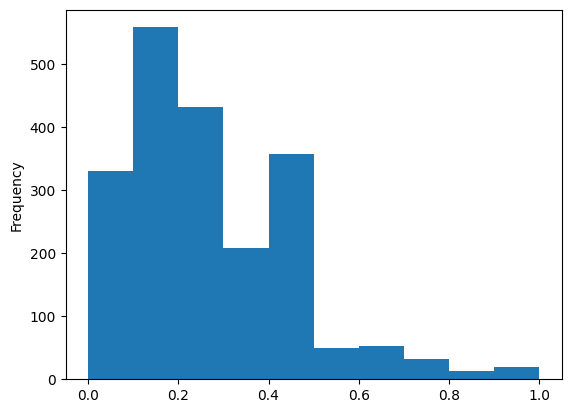

In [36]:
df["risk_premium_normalised"].plot(kind="hist")
